In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris

In [9]:
# Loading the Iris dataset
iris = load_iris()

# Creating a DataFrame from the dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first 5 rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [17]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [21]:
iris_df.duplicated().sum()

1

Observations:
Dataset Summary (describe()):

The dataset has 4 numerical columns: sepal length, sepal width, petal length, and petal width.
All values seem within reasonable ranges.

Dataset Info (info()):

No missing values (150 non-null for all columns).
All columns are of type float64.

Missing Values (isnull().sum()):
There are no missing values in the dataset.

Duplicates (duplicated().sum()):
There is 1 duplicate row.


In [25]:
iris_df = iris_df.drop_duplicates()
iris_df.duplicated().sum()

0

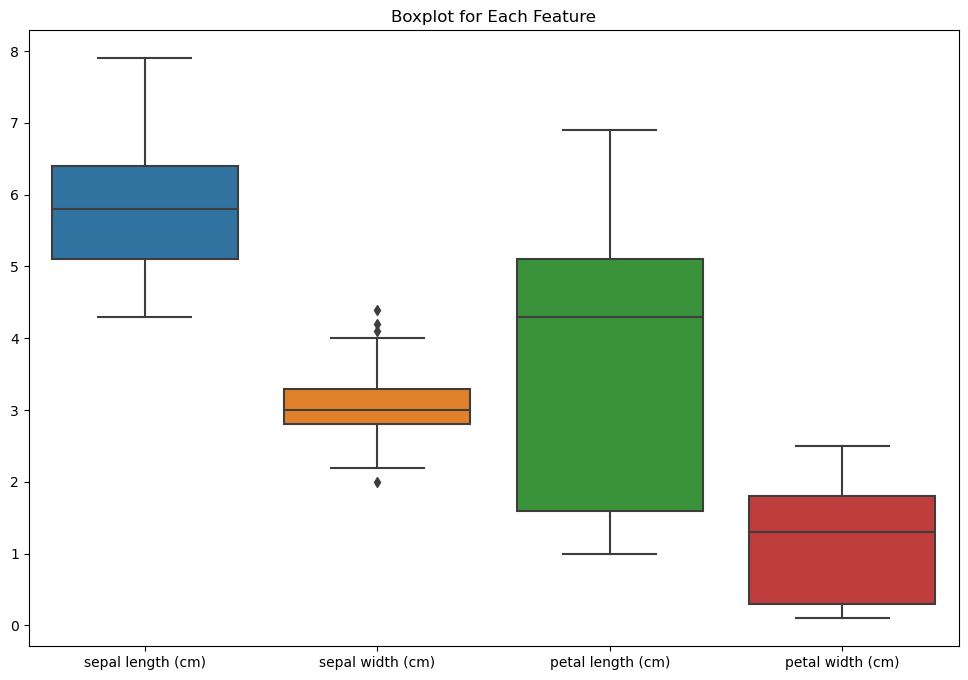

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating boxplots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df)
plt.title('Boxplot for Each Feature')
plt.show()


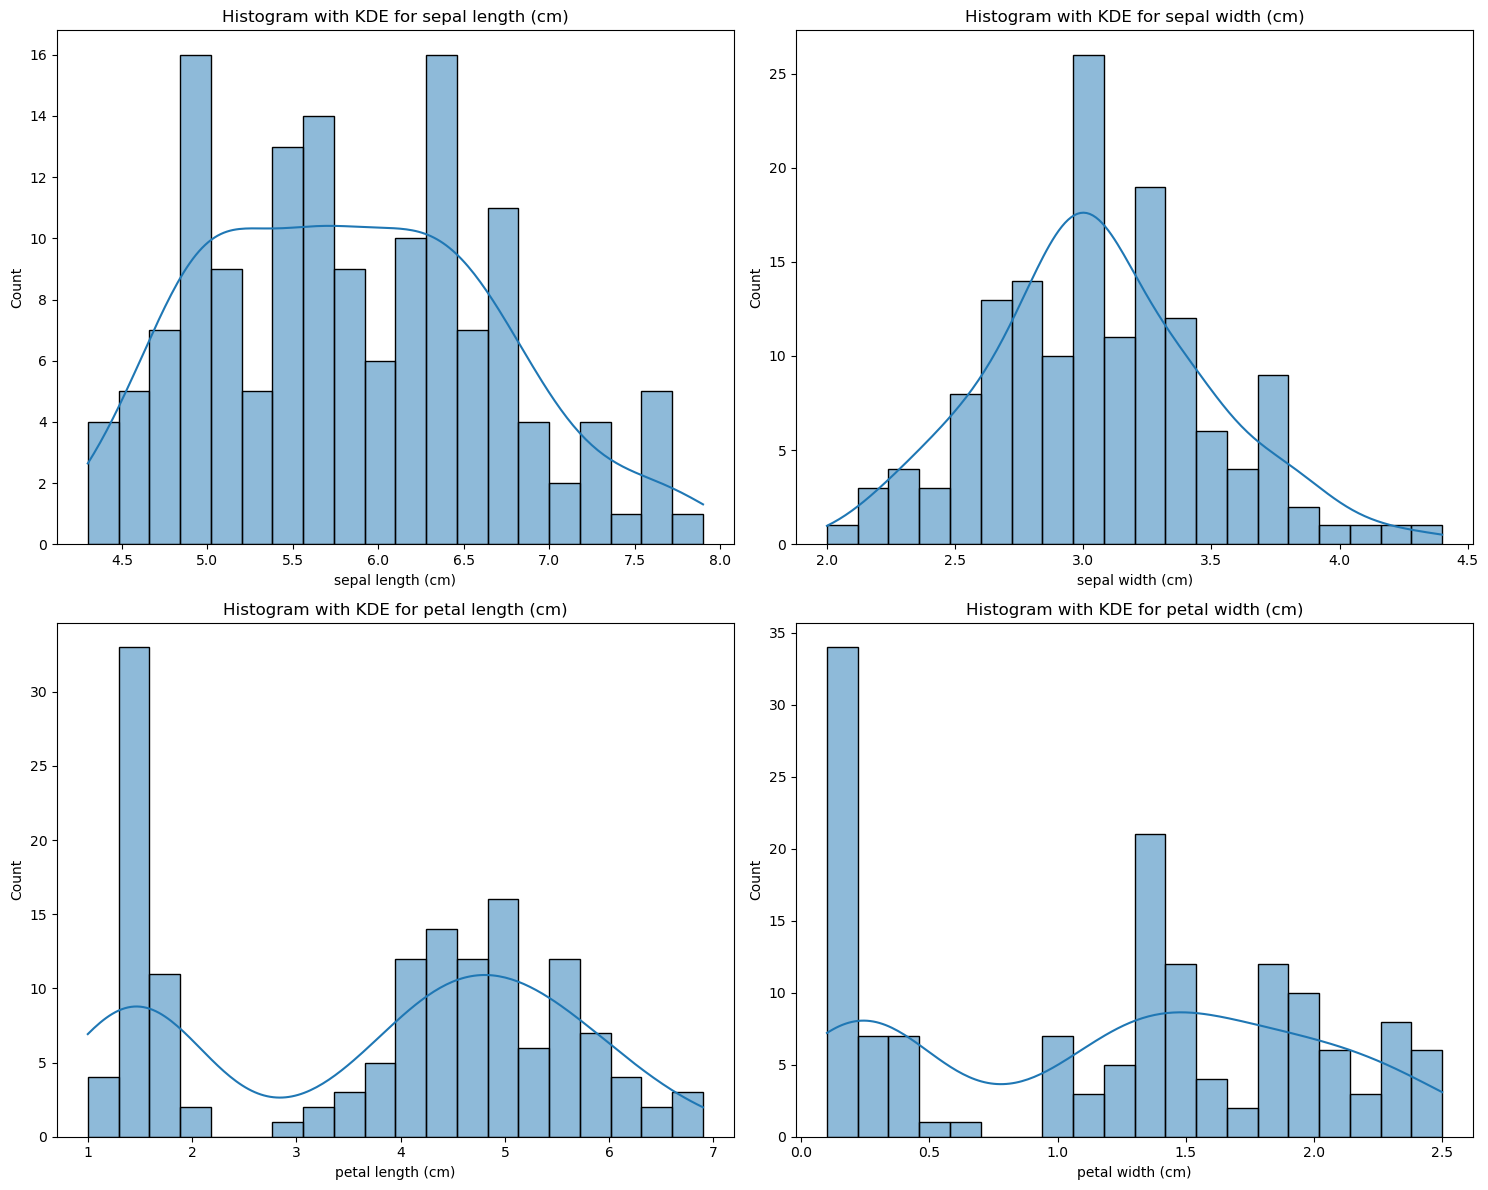

In [35]:
# Creating separate histograms with KDE for each feature
features = iris_df.columns

# Setting up the plot
plt.figure(figsize=(15, 12))

# Loop through each feature and plot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a grid of 2x2 subplots
    sns.histplot(iris_df[feature], kde=True, bins=20)
    plt.title(f'Histogram with KDE for {feature}')
    
plt.tight_layout()
plt.show()


In [37]:
# Checking skewness of each feature
skewness = iris_df.skew()

# Displaying the skewness values
print("Skewness of each feature:\n", skewness)


Skewness of each feature:
 sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64


Interpretation:
Since the skewness values are relatively close to 0 (within the range of -0.5 to 0.5), we can conclude that the features are nearly normally distributed.

In [39]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(iris_df)

# Checking the absolute Z-scores
outliers = (abs(z_scores) > 3).sum(axis=0)

# Displaying the number of outliers for each feature
print("Number of outliers in each feature based on Z-score:", outliers)


Number of outliers in each feature based on Z-score: sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [41]:
# Calculating IQR to detect outliers
Q1 = iris_df.quantile(0.25)
Q3 = iris_df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using IQR
outliers_iqr = ((iris_df < (Q1 - 1.5 * IQR)) | (iris_df > (Q3 + 1.5 * IQR))).sum()

# Displaying outliers based on IQR
print("Outliers based on IQR method:\n", outliers_iqr)


Outliers based on IQR method:
 sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [43]:
# Capping outliers using the 1st and 99th percentiles
lower_limit = Q1['sepal width (cm)'] - 1.5 * IQR['sepal width (cm)']
upper_limit = Q3['sepal width (cm)'] + 1.5 * IQR['sepal width (cm)']

iris_df_capped = iris_df.copy()
iris_df_capped['sepal width (cm)'] = iris_df_capped['sepal width (cm)'].clip(lower=lower_limit, upper=upper_limit)

# Displaying the capped data
print(iris_df_capped.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [47]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
iris_df_scaled = scaler.fit_transform(iris_df_capped)

# Convert to DataFrame
iris_df_scaled = pd.DataFrame(iris_df_scaled, columns=iris_df.columns)

# Display the scaled data
iris_df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667


#Clustering Algorithm Implementation

KMeans Clustering

Description:
KMeans is an unsupervised learning algorithm that partitions the data into a pre-defined number of clusters (K). It works by minimizing the variance within each cluster, iteratively refining the cluster assignments by assigning data points to the nearest centroid and updating the centroid positions.

Why KMeans for this dataset:
The Iris dataset has well-separated clusters, making it a good candidate for KMeans clustering. We can try to find 3 clusters, as the Iris dataset contains 3 species (although we won't use the species column, we can assume the data might form 3 clusters).

Elbow Method 
The Elbow Method helps to determine the optimal value of K by plotting the explained variation as a function of the number of clusters.

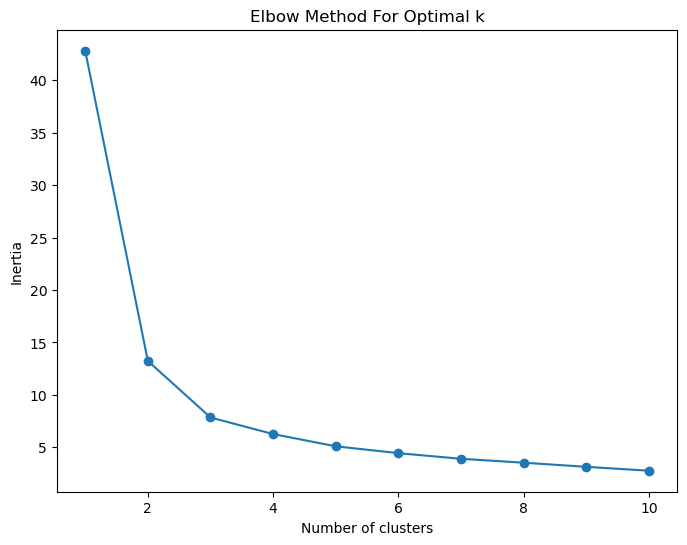

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [57]:
pip install kneed


  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [63]:
from kneed import KneeLocator

# Define a range of possible cluster numbers (e.g., 1 to 10)
inertia_values = []
k_range = range(1, 11)

# Calculate inertia for each value of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Use KneeLocator to find the optimal number of clusters
knee = KneeLocator(k_range, inertia_values, curve="convex", direction="decreasing")

# Print the optimal number of clusters
print(f"Optimal number of clusters (K): {knee.knee}")


Optimal number of clusters (K): 3


In [59]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [65]:
# Apply KMeans with 3 clusters (based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df_scaled)

# Adding the cluster labels to the original dataset
iris_df_scaled['Cluster'] = kmeans.labels_

# Displaying the first few rows of the clustered dataset
iris_df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


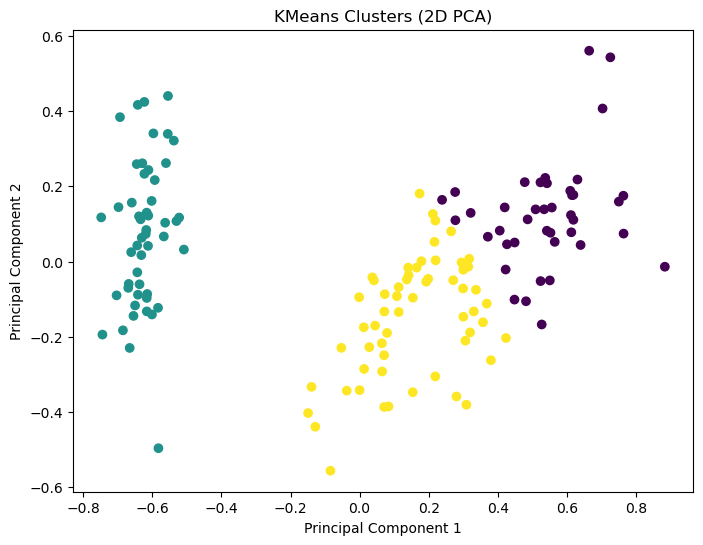

In [67]:
from sklearn.decomposition import PCA

# Reduce the data to 2D for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df_scaled.drop('Cluster', axis=1))

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df_scaled['Cluster'], cmap='viridis')
plt.title('KMeans Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



How KMeans Clustering Works:
KMeans is a centroid-based clustering algorithm that partitions the data into a predefined number of clusters (K). Here's how it works step-by-step:

Initialization: Randomly assign K cluster centroids (points in the feature space).
Assignment Step: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
Update Step: Compute the new centroids by taking the mean of all data points assigned to each cluster.
Iterate: Repeat the assignment and update steps until the centroids stabilize or the maximum number of iterations is reached.
Output: Returns cluster labels and cluster centroids.

Why KMeans Clustering is Suitable for the Iris Dataset:
Low-dimensional data: The Iris dataset has only four features, making it manageable for KMeans.
Compact clusters: The classes in the Iris dataset are well-separated, which aligns with KMeans' ability to form compact, spherical clusters.
Unsupervised problem: Since the true labels (species) are not used for clustering, KMeans can group the data based on inherent patterns.

#Hierarchical Clustering

How Hierarchical Clustering Works
Hierarchical clustering is a hierarchy-based clustering method that groups data points by creating a tree-like structure called a dendrogram. There are two main types:

Agglomerative (Bottom-up):

Starts with each data point as its own cluster.
Iteratively merges the closest clusters based on a distance metric (e.g., Euclidean).
Stops when all data points are merged into a single cluster or when a specific number of clusters is reached.


Divisive (Top-down):
Starts with all data points in one cluster.
Splits the cluster iteratively into smaller clusters until each data point is its own cluster.

Why Hierarchical Clustering is Suitable for the Iris Dataset:
Small Dataset:
The Iris dataset has only 150 rows, making it computationally feasible for hierarchical clustering, which becomes resource-intensive for large datasets.

Natural Grouping:
The dataset inherently has three species of flowers (setosa, versicolor, and virginica). Hierarchical clustering can effectively uncover these natural groupings without needing to predefine the number of clusters.

Visualization of Relationships:
Hierarchical clustering provides a dendrogram that visually represents how data points or clusters are merged. This can help analyze the relationships between clusters and verify the natural separations in the Iris dataset.

No Assumption on Cluster Shape:
Unlike KMeans, which assumes clusters are spherical, hierarchical clustering doesn't impose such assumptions, making it a flexible option for datasets like Iris.

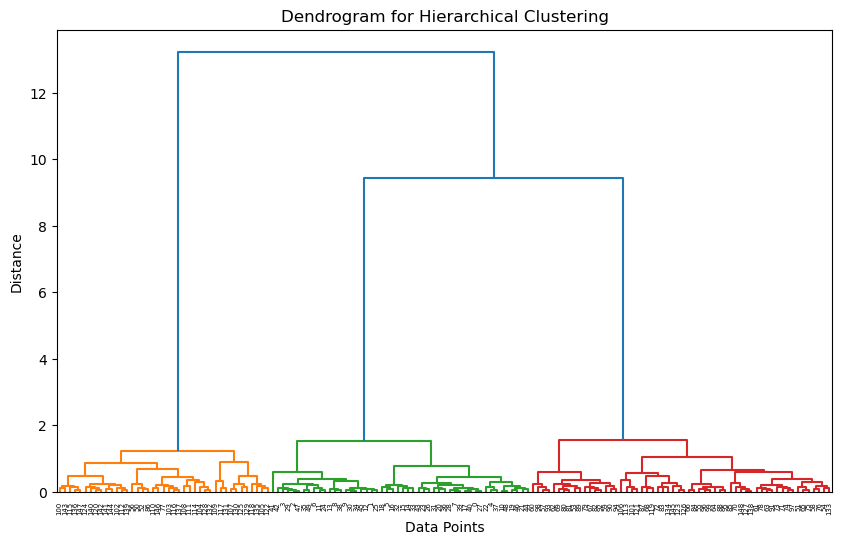

In [69]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#  Create the linkage matrix for the dendrogram
linkage_matrix = linkage(iris_df_scaled, method='ward')  # Ward's method minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


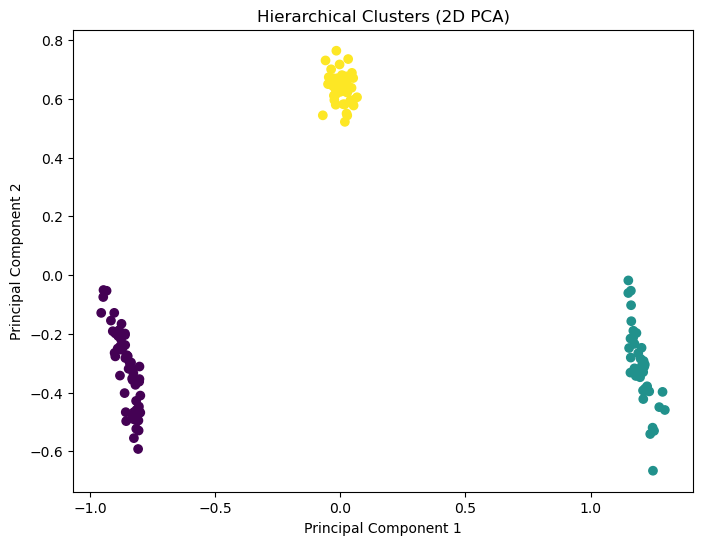

In [71]:
#  Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
iris_df_scaled['Cluster_Hierarchical'] = agg_clustering.fit_predict(iris_df_scaled)

#  Reduce the data to 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca_hierarchical = pca.fit_transform(iris_df_scaled.drop('Cluster_Hierarchical', axis=1))

#  Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    iris_pca_hierarchical[:, 0],
    iris_pca_hierarchical[:, 1],
    c=iris_df_scaled['Cluster_Hierarchical'],
    cmap='viridis'
)
plt.title("Hierarchical Clusters (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
